<b> Introduction <b>:
    
Electric Vehicle (EV) charging stations are infrastructure facilities designed to recharge electric vehicles. As the popularity of electric vehicles continues to grow, the demand for charging stations has increased significantly. These stations are crucial for supporting the widespread adoption of electric vehicles by providing drivers with convenient locations to recharge their vehicles' batteries.

There are several types of EV charging stations, each offering different charging speeds and capabilities:

<b>Level 1 Charging <b>  :
    This is the slowest charging option and typically involves plugging the vehicle into a standard 120-volt household outlet. Level 1 chargers are convenient for overnight charging at home but may take several hours to fully charge a vehicle.

<b>Level 2 Charging<b> : 
    Level 2 chargers require a 240-volt power source and can provide faster charging compared to Level 1. These chargers are commonly found in public locations such as parking lots, shopping centers, and workplaces.

<b>DC Fast Charging (Level 3)<b> : 
    DC fast chargers offer the fastest charging speeds and are capable of providing a significant amount of power to the vehicle's battery in a short amount of time. These chargers are typically found along highways and major travel routes for quick recharging during long journeys.

<b>Use-Case: Filtering Charging Station <b>
    
Our use-case involves analyzing and visualizing data related to EV charging stations. The dataset contains information about the location, capacity, and other properties of charging stations across a specific region or geographic area.

Objectives:

Analyze the distribution and characteristics of charging stations.
Identify trends and patterns in the data to better understand the deployment of EV charging infrastructure.
Visualize the data using various techniques such as maps, charts, and graphs to gain insights and communicate findings effectively.


Importing all the necessary libraries

In [ ]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium


Converting the downloaded datafile into CSV

In [76]:

# Load JSON data
with open(r'C:/Users/Admin/OneDrive/EVCFLO/Branches/Shilpa-Sharma/download.geojson', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.json_normalize(data['features'])

# Save as CSV
df.to_csv('charging_stations_data.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


In [52]:
# Inspect the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
      type              id  properties.@id properties.amenity properties.area  \
0  Feature   way/762728901   way/762728901   charging_station             yes   
1  Feature  way/1176146545  way/1176146545   charging_station             NaN   
2  Feature  way/1189771948  way/1189771948   charging_station             NaN   
3  Feature  way/1253852373  way/1253852373   charging_station             NaN   
4  Feature  way/1258973419  way/1258973419   charging_station             NaN   

     properties.brand properties.brand:wikidata  properties.description  \
0         Tesla, Inc.                   Q478214  Hollydene Supercharger   
1  Tesla Supercharger                 Q17089620                     NaN   
2                 NaN                       NaN                     NaN   
3   Tesla Destination                       NaN                     NaN   
4              EVlink                       NaN                     NaN   

  properties.opening_hours pr

In [53]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
type                                  0
id                                    0
properties.@id                        0
properties.amenity                    0
properties.area                     860
                                   ... 
properties.not:operator:wikidata    860
properties.socket:unknown           859
properties.payment:apple_pay        860
properties.man_made                 860
properties.socket:ccs:output        860
Length: 131, dtype: int64


In [54]:
# Find columns with list type
columns_with_lists = [col for col in df.columns if isinstance(df[col].iloc[0], list)]
print("Columns with list type:", columns_with_lists)

Columns with list type: ['geometry.coordinates']


Merging the different columns of socket into a single column & puting it into a new csv called filtered_charging

In [77]:
# Define a list of relevant columns
relevant_columns = [
    'id',
    'properties.amenity',
    'properties.brand',
    'properties.description',
    'properties.opening_hours',
    'properties.short_name',
    'properties.socket:type2',
    'properties.socket:type1_combo',
    'properties.socket:chademo',
    'properties.socket:tesla',
    'geometry.type',
    'geometry.coordinates',
    'properties.capacity',
    'properties.addr:city',
    'properties.addr:country',
    'properties.addr:postcode',
    'properties.addr:state',
    'properties.location'
]

# Filter the DataFrame to include only the relevant columns and make a copy
filtered_df = df[relevant_columns].copy()

# Combine the socket columns into one
def combine_sockets(row):
    socket_types = []
    for col in ['properties.socket:type2', 'properties.socket:type1_combo', 'properties.socket:chademo', 'properties.socket:tesla']:
        if pd.notna(row[col]):
            socket_types.append(str(row[col]))  # Convert to string
    return ', '.join(socket_types) if socket_types else None

filtered_df['socket_types'] = filtered_df.apply(combine_sockets, axis=1)

# Drop the individual socket columns
filtered_df.drop(columns=['properties.socket:type2',
                          'properties.socket:type1_combo',
                          'properties.socket:chademo',
                          'properties.socket:tesla'], inplace=True)

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())
# Display the columns in the filtered DataFrame
print(filtered_df.columns)

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_charging_stations_data.csv', index=False)
print("Filtered data saved to filtered_charging_stations_data.csv")



               id properties.amenity    properties.brand  \
0   way/762728901   charging_station         Tesla, Inc.   
1  way/1176146545   charging_station  Tesla Supercharger   
2  way/1189771948   charging_station                 NaN   
3  way/1253852373   charging_station   Tesla Destination   
4  way/1258973419   charging_station              EVlink   

   properties.description properties.opening_hours properties.short_name  \
0  Hollydene Supercharger                     24/7                 Tesla   
1                     NaN                      NaN                 Tesla   
2                     NaN                      NaN                   NaN   
3                     NaN                     24/7                   NaN   
4                     NaN                      NaN                   NaN   

  geometry.type                               geometry.coordinates  \
0       Polygon  [[[150.8323303, -32.4473776], [150.8322847, -3...   
1       Polygon  [[[139.5011723, -35.30401

Removed the rows that are showing NaN value  & saved into a new csv called cleaned.

In [78]:
# Load the filtered charging sheet CSV into a DataFrame
df_filtered_charging_stations_data = pd.read_csv('C:/Users/Admin/OneDrive/EVCFLO/Branches/Shilpa-Sharma/filtered_charging_stations_data.csv')

# Remove rows where all values are NaN
cleaned_df = df_filtered_charging_stations_data.dropna(how='all')

# Specify the file name for the cleaned CSV file
cleaned_csv_file = 'cleaned_charging_station.csv'

# Save the cleaned data to a new CSV file
cleaned_df.to_csv(cleaned_csv_file, index=False)

print(f"Cleaned data saved to {cleaned_csv_file}")

Cleaned data saved to cleaned_charging_station.csv


To explore the unique values in the columns related to charging sockets, we can use the unique() method in pandas. 

In [79]:
# Explore unique values in the 'socket_types' column
print("Unique values in 'socket_types':")
print(filtered_df['socket_types'].unique())


Unique values in 'socket_types':
[None '2' '1, 1' '2, 1' '4' '1' '3' '6' '22 kW' 'yes' 'no' '2, 2' '3, 1']


In [40]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


Filetering the charger type & brand as per user need.

In [62]:

# Load the charging station data into a DataFrame
df = pd.read_csv('C:/Users/Admin/OneDrive/EVCFLO/Branches/Shilpa-Sharma/cleaned_charging_station.csv')

# Define function to get city name from postcode
def get_city_from_postcode(postcode):
    # Code to get city name from postcode (you can implement this based on your specific requirements)
    return "CityName"

# Input from the user
desired_postcode = input("Enter your current postcode: ")
desired_max_distance = float(input("Enter the maximum distance to consider as nearby (in kilometers): "))
desired_socket_type = input("Enter desired charging socket type (leave blank for any): ")
desired_speed = input("Enter desired minimum charging speed (leave blank for any): ")

# Convert input to int if provided
if desired_speed:
    desired_speed = int(desired_speed)

# Filter DataFrame based on user's input
filtered_df = df.copy()
if desired_socket_type:
    regex_pattern = r'\b{}\b'.format(desired_socket_type)
    filtered_df = filtered_df[filtered_df['socket_types'].str.contains(regex_pattern, case=False, na=False)]
if desired_speed:
    filtered_df = filtered_df[filtered_df['socket_types'].str.extract('(\d+)').astype(float) >= desired_speed]

# Drop rows with NaN values in relevant columns
filtered_df = filtered_df.dropna(subset=['properties.brand', 'socket_types'])

# If there are no nearby charging stations found, print a message
if filtered_df.empty:
    print("No nearby charging stations found.")
else:
    # Get city name from postcode and add it to the filtered DataFrame
    filtered_df['City'] = filtered_df['properties.addr:postcode'].apply(get_city_from_postcode)
    # Display the filtered DataFrame with city name and relevant columns
    relevant_columns = ['properties.brand', 'socket_types', 'City']
    print(filtered_df[relevant_columns])


Enter your current postcode:  2575
Enter the maximum distance to consider as nearby (in kilometers):  48
Enter desired charging socket type (leave blank for any):  3
Enter desired minimum charging speed (leave blank for any):  


    properties.brand socket_types      City
161        Chargefox            3  CityName
483      Tesla, Inc.            3  CityName


Exploring the distribution of charging speeds among the charging station by creating a histogram to visualize the spread of charging speeds.

<Figure size 1200x600 with 0 Axes>

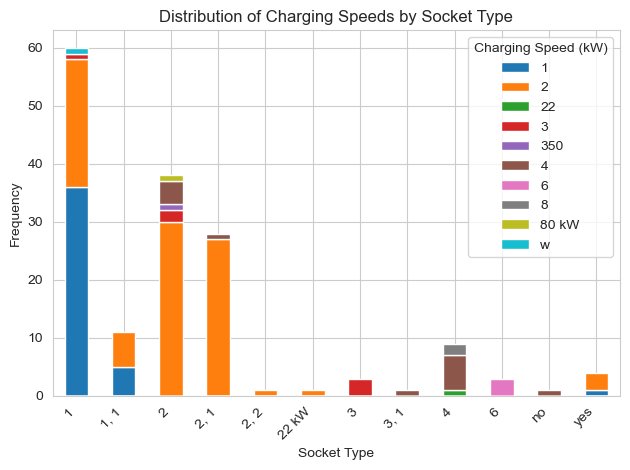

In [81]:

# Count the occurrences of each charging speed by socket type
speed_counts = filtered_df.groupby('socket_types')['properties.capacity'].value_counts().unstack().fillna(0)

# Plot the bar chart
plt.figure(figsize=(12, 6))
speed_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Charging Speeds by Socket Type')
plt.xlabel('Socket Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Charging Speed (kW)')
plt.tight_layout()
plt.show()

Plotting number of EV stations via state

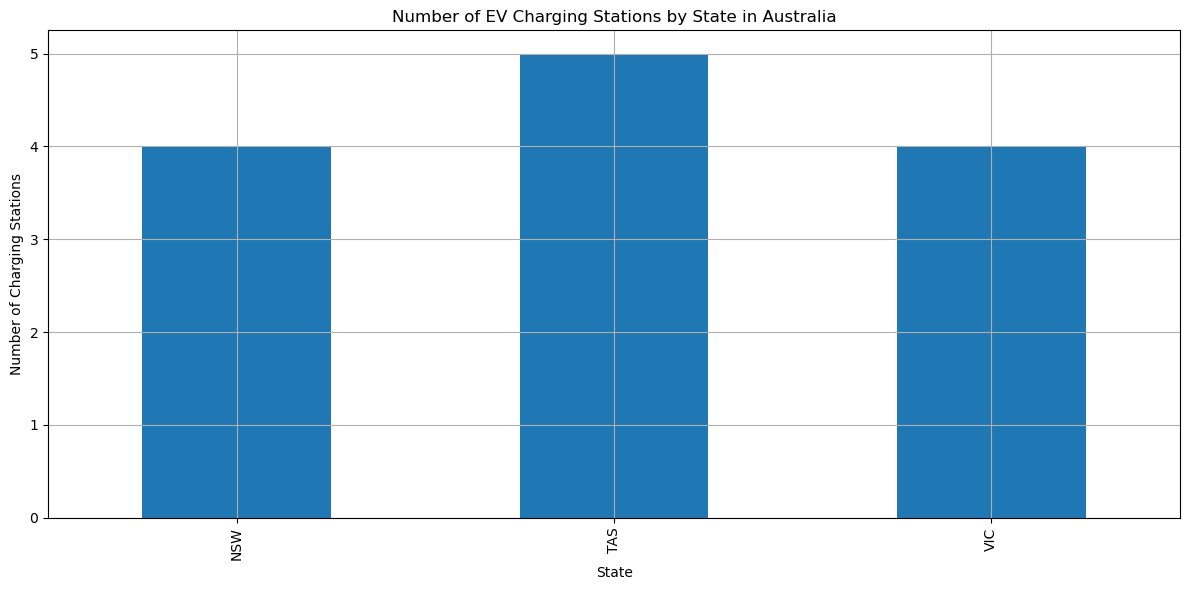

In [49]:

# Load the original charging stations data
data_path = "C:/Users/Admin/OneDrive/EVCFLO/Branches/Shilpa-Sharma/charging_stations_data.csv"
charging_stations_df = pd.read_csv(data_path)
# Count the number of charging stations by state
charging_stations_by_state = charging_stations_df.groupby('properties.addr:state').size()

# Plotting
charging_stations_by_state.plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.title('Number of EV Charging Stations by State in Australia')
plt.grid(True)
plt.tight_layout()
plt.show()

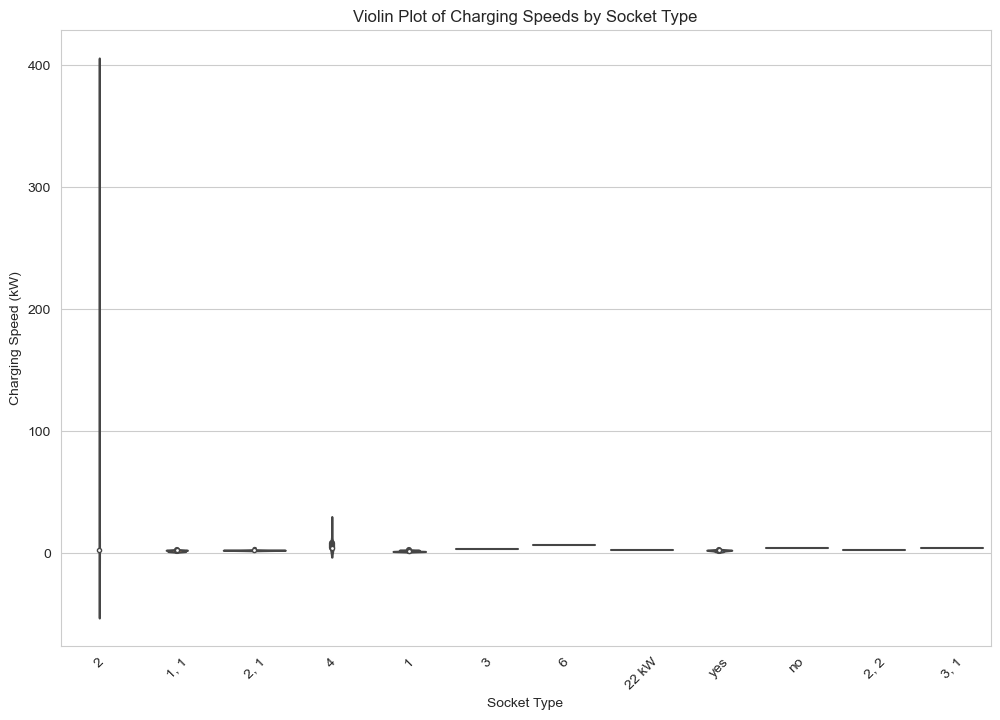

In [84]:
# Convert 'properties.capacity' to numeric, coerce errors to NaN
filtered_df['properties.capacity'] = pd.to_numeric(filtered_df['properties.capacity'], errors='coerce')

# Remove rows with NaN values in 'properties.capacity'
filtered_df.dropna(subset=['properties.capacity'], inplace=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(x='socket_types', y='properties.capacity', data=filtered_df)

# Set the title and labels
plt.title('Violin Plot of Charging Speeds by Socket Type')
plt.xlabel('Socket Type')
plt.ylabel('Charging Speed (kW)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


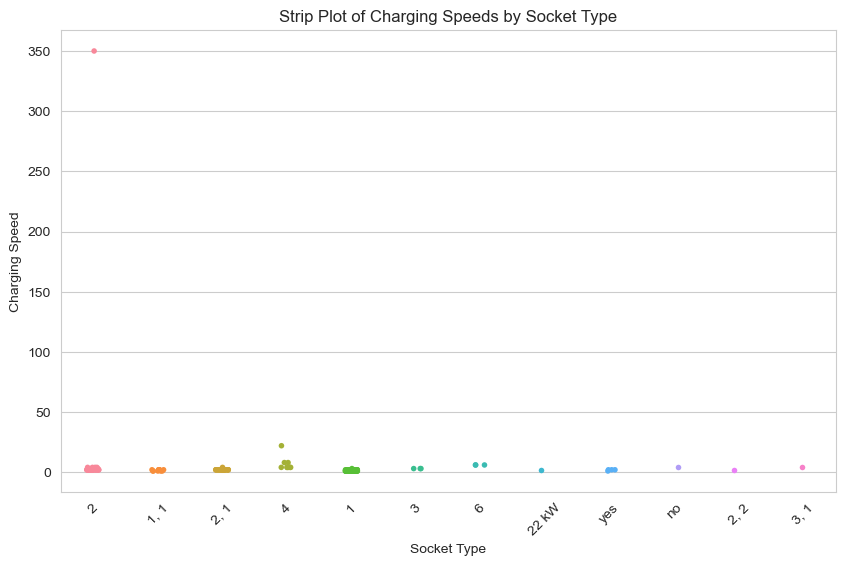

In [86]:
# Create a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='socket_types', y='properties.capacity', data=filtered_df, jitter=True, size=4)
plt.title('Strip Plot of Charging Speeds by Socket Type')
plt.xlabel('Socket Type')
plt.ylabel('Charging Speed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


Geographical representation of charging stations located along witheir charging capacity.

In [91]:
# Filter out rows with 'Point' geometry type
point_df = df[df['geometry.type'] == 'Point']

# Initialize the map
mymap = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)  # Center the map on Australia

# Iterate through each charging point
for index, row in point_df.iterrows():
    # Extract latitude and longitude
    lat, lon = row['geometry.coordinates']
    
    # Add marker for each charging point
    folium.Marker(location=[lat, lon]).add_to(mymap)

# Display the map
mymap
